# Classificação usando Regressão Logística


## Bibliotecas usadas:
- scikit-learn (LogisticRegression)
  - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- pandas

In [1]:
from google.colab import files
uploaded_tr = files.upload()

Saving avila-tr.txt to avila-tr.txt


In [2]:
import pandas as pd
import io

labels = ["intercolumnar distance","upper margin","lower margin","exploitation","row number","modular ratio","interlinear spacing","weight","peak number","modular ratio/ interlinear spacing","Class"]

# path_dataset = "/content/drive/MyDrive/Disciplinas/2022.2/AM-GRAD 2022-2/Projeto AM 2022-2/data/avila-tr.txt"

avila_tr = pd.read_csv(io.StringIO(uploaded_tr['avila-tr.txt'].decode('utf-8')), header=None,names=labels)
avila_tr.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [3]:
uploaded_ts = files.upload()

Saving avila-ts.txt to avila-ts.txt


In [4]:
avila_ts = pd.read_csv(io.StringIO(uploaded_ts['avila-ts.txt'].decode('utf-8')), header=None,names=labels)
avila_ts.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


O primeiro ponto importante a ser notado é que o problema em questão é de classificação multi-classe. O algoritmo de regressão logística consegue separar um dado entre 2 classes, tal como um problema de sim ou não. Assim, para um problema multi-classe, podemos tratar cada classe como um problema de classificação binária, ou seja, vamos comparar, para cada classe, se um dado pertence a ela ou não. Essa abordagem é conhecida como "método de um contra todos". Nessa abordagem, ao trabalharmos com uma classe, essa classe é denotada por 1 e as outras, por 0.

In [222]:
SEED = 2022

### Separando os datasets em features e variável alvo.

In [151]:
X_train = avila_tr.iloc[:, :-1]
y_train = avila_tr.iloc[:, -1]

X_test = avila_ts.iloc[:, :-1]
y_test = avila_ts.iloc[:, -1]

In [6]:
classes = sorted(y_train.unique())

### Importando dependências

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Modelo base

## Setup do modelo

In [287]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, random_state=SEED)

## Treinamento

In [288]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=2022)

## Teste

In [289]:
model.score(X_test, y_test)

0.5309954967902654

In [290]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.50      0.97      0.66      4286
           B       1.00      1.00      1.00         5
           C       0.00      0.00      0.00       103
           D       0.00      0.00      0.00       353
           E       0.40      0.07      0.12      1095
           F       0.19      0.03      0.05      1962
           G       0.00      0.00      0.00       447
           H       0.47      0.08      0.13       520
           I       0.82      0.88      0.85       832
           W       0.00      0.00      0.00        45
           X       0.82      0.67      0.74       522
           Y       0.74      0.47      0.58       267

    accuracy                           0.53     10437
   macro avg       0.41      0.35      0.34     10437
weighted avg       0.43      0.53      0.42     10437



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


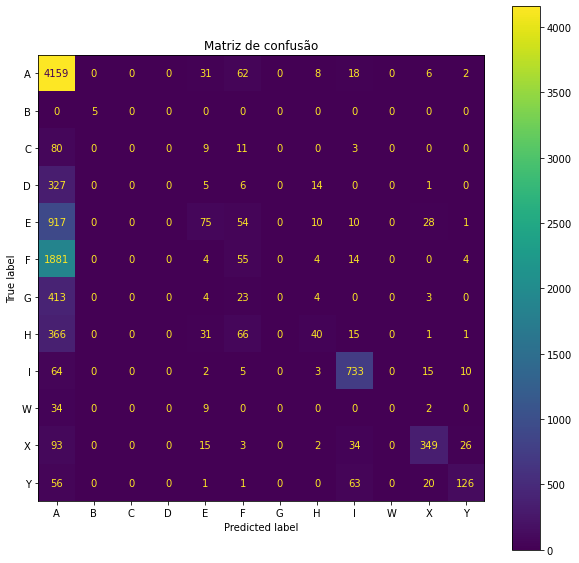

In [291]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Matriz de confusão")
conf_mat = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
disp.plot(ax=ax)
plt.show()

### Conclusão

Não tivemos uma boa acurácia. Para buscar os melhores parâmetros, vamos usar um grid search com cross validation.

## Conclusão geral

O modelo de regressão logística não é adequado para o teste nesse dataset. Isso acontece por alguns motivos, dentre os quais estão o desbalanceamento do dataset e a proximidade dos exemplos do dataset. Levando em conta esses 2 fatores, pode-se inferir que modelos que possuam uma avaliação discreta das features, tal como a árvore de decisão, devem performar melhor que a regressão logística, a qual utiliza os valores das features para calcular um valor entre 0 e 1 e também utiliza um threshold para realizar a classificação.

# Grid search

In [228]:
from sklearn.model_selection import GridSearchCV
parameters = {'multi_class': ["ovr", "multinomial"], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}
log_reg = LogisticRegression(max_iter=1000, random_state=SEED)
log_reg_cv = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=5, n_jobs=-1, scoring=['precision_macro','recall_macro','f1_macro'], refit=False)
log_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=2022),
             n_jobs=-1,
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             refit=False,
             scoring=['precision_macro', 'recall_macro', 'f1_macro'])

In [229]:
results_df = pd.DataFrame(log_reg_cv.cv_results_)
results_df[['mean_test_f1_macro','mean_test_recall_macro','mean_test_precision_macro', 'params']]

,mean_test_f1_macro,mean_test_recall_macro,mean_test_precision_macro,params
0,0.337121,0.345924,0.403675,"{'multi_class': 'ovr', 'solver': 'lbfgs'}"
1,0.337121,0.345924,0.403675,"{'multi_class': 'ovr', 'solver': 'newton-cg'}"
2,0.263750,0.266564,0.343546,"{'multi_class': 'ovr', 'solver': 'sag'}"
3,0.247812,0.253806,0.334808,"{'multi_class': 'ovr', 'solver': 'saga'}"
4,0.398664,0.398872,0.464567,"{'multi_class': 'multinomial', 'solver': 'lbfgs'}"
5,0.398659,0.398872,0.464561,"{'multi_class': 'multinomial', 'solver': 'newt..."
6,0.323552,0.317889,0.388802,"{'multi_class': 'multinomial', 'solver': 'sag'}"
7,0.312036,0.305537,0.385156,"{'multi_class': 'multinomial', 'solver': 'saga'}"


Analisando a tabela, é possível identificar que os melhores parâmetros são "multinomial" para "multi_class" e "lbfgs" para "solver. Vamos treinar um modelo base utilizando-os.

# Modelo com melhores parâmetros

## Setup do modelo

Utilizando os melhores parâmetros testados pelo grid search, temos "multi_class" como "multinomial", o que significa que o algoritmo de treinamento usará "cross-entropy loss", e o parâmetro "solver" como "lbfgs".

In [223]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=SEED)

## Treinamento

In [224]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=2022)

## Teste

In [225]:
model.score(X_test, y_test)

0.5613682092555332

In [226]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.53      0.94      0.68      4286
           B       1.00      1.00      1.00         5
           C       0.00      0.00      0.00       103
           D       0.00      0.00      0.00       353
           E       0.53      0.25      0.34      1095
           F       0.37      0.09      0.15      1962
           G       0.00      0.00      0.00       447
           H       0.47      0.18      0.26       520
           I       0.85      0.87      0.86       832
           W       0.22      0.04      0.07        45
           X       0.75      0.71      0.73       522
           Y       0.70      0.64      0.67       267

    accuracy                           0.56     10437
   macro avg       0.45      0.39      0.40     10437
weighted avg       0.49      0.56      0.48     10437



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


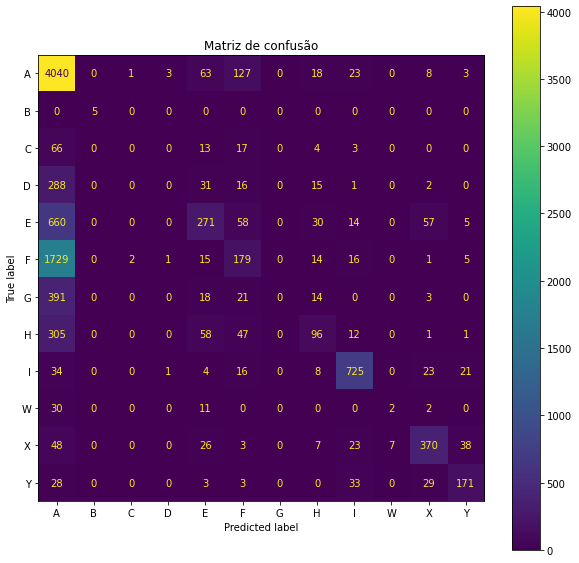

In [227]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Matriz de confusão")
conf_mat = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
disp.plot(ax=ax)
plt.show()

### Conclusão

Foi possível perceber que o modelo base errou todos das classes C, D e G, além de ter errado a maioria dos exemplos das classes E, F, H e W. Além disso, um fato muito interessante de se notar é que todas essas classes que não tiveram bons resultados foram confundidas com exemplos da classe A. Isso provavelmente aconteceu devido ao desbalanceamento do dataset, com muito mais dados da classe A. Assim, para a primeira tentativa de melhoria do modelo, vamos apenas diminuir a quantidade de exemplos da classe A e manter os outros parâmetros.

# Modelo com mudança no balanceamento do dataset

## Setup do modelo

Para este modelo, vamos reduzir o número de exemplos da classe A.

In [234]:
balanced_dataset = avila_tr.drop(avila_tr.query("Class == 'A'").sample(frac=0.5).index)
balanced_dataset.shape

(8287, 11)

In [235]:
X_train_balanced = balanced_dataset.iloc[:, :-1]
y_train_balanced = balanced_dataset.iloc[:, -1]

In [236]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=SEED)

## Treinamento

In [237]:
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=2022)

## Teste

In [238]:
model.score(X_test, y_test)

0.5606975184439973

In [239]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.67      0.65      0.66      4286
           B       1.00      1.00      1.00         5
           C       0.00      0.00      0.00       103
           D       0.00      0.00      0.00       353
           E       0.51      0.45      0.48      1095
           F       0.35      0.60      0.44      1962
           G       0.17      0.02      0.03       447
           H       0.45      0.26      0.33       520
           I       0.84      0.87      0.86       832
           W       0.14      0.04      0.07        45
           X       0.72      0.71      0.72       522
           Y       0.69      0.64      0.66       267

    accuracy                           0.56     10437
   macro avg       0.46      0.44      0.44     10437
weighted avg       0.55      0.56      0.54     10437



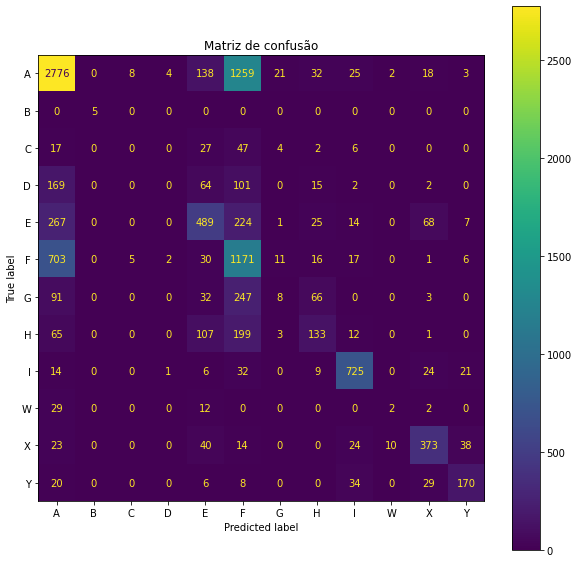

In [240]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Matriz de confusão")
conf_mat = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
disp.plot(ax=ax)
plt.show()

### Conclusão

O resultado da classificação melhorou muito para algumas das classes, como a E e a F, mas ele piorou para a classe A. Observando as matrizes de confusão dos dois modelos testados até aqui, é possível inferir que as classes A e F estão gerando muitos problemas para a classificação. Isso pode estar acontecendo porque ambas as classes devem possuir exemplos muito próximos uns dos outros, dificultando sua separação. Vamos utilizar a técnica do PCA para identificar as features que melhor separam ambas as classes e utilizá-las para realizar a classificação.

# Modelo com mudança nas colunas do dataset

## Setup do modelo

Inicialmente vamos tentar procurar formas de separar as classes A e F, a fim de melhorar a acurácia do modelo. Para isso, vamos tentar utilizar o PCA.

In [241]:
avila_tr_A = avila_tr.query("Class == 'A'")
avila_tr_F = avila_tr.query("Class == 'F'")
avila_tr_A_F = pd.concat([avila_tr_A, avila_tr_F], axis=0)
avila_tr_A_F

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
5,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A
...,...,...,...,...,...,...,...,...,...,...,...
10405,-0.091897,-0.142067,0.324537,0.658210,0.172340,-0.307984,0.295677,-0.168119,-0.840179,-0.324222,F
10409,-2.523635,-0.346197,-2.349878,-0.775688,0.172340,-0.474083,0.371178,0.574559,-0.029461,-0.505543,F
10413,0.241386,-0.110662,0.324537,-0.772226,0.261718,0.397939,0.257927,-1.689549,-0.559546,0.334759,F
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F


### Análise utilizando PCA

In [242]:
from sklearn.decomposition import PCA

Como os dados já estão normalizados, podemos partir para o "fit" e o "transform" no PCA

In [243]:
X_train_A_F = avila_tr_A_F.iloc[:, :-1]
y_train_A_F = avila_tr_A_F.iloc[:, -1]

In [244]:
principal = PCA(n_components=3)
principal.fit(X_train_A_F)
x = principal.transform(X_train_A_F)
x.shape

(6247, 3)

O número de features foi reduzida para 3. Com o PCA feito, podemos plotar um gráfico para verificar se os componentes principais conseguem separar as classes A e F.

In [245]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train_A_F)
encoded_labels = le.transform(y_train_A_F)
encoded_labels

array([0, 0, 0, ..., 1, 1, 1])

Text(0, 0.5, 'pc2')

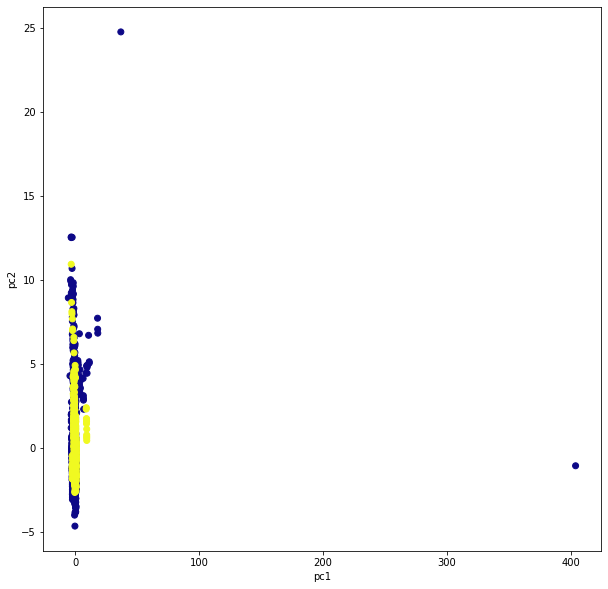

In [246]:
plt.figure(figsize=(10,10))
colors = np.random.rand(6247)
plt.scatter(x=x[:,0], y=x[:,1], c=encoded_labels, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

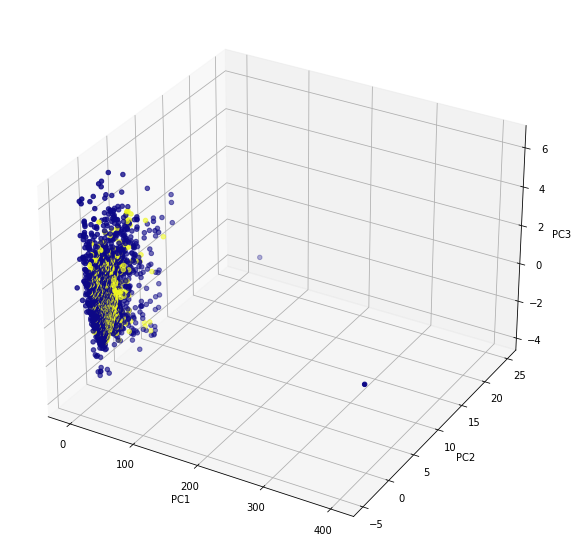

In [247]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=encoded_labels,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Utilizando o PCA foi possível ver que, mesmo utilizando os principais componentes para separar os dados, eles ainda não são bem separáveis. Assim, vamos tentar reduzir o número de features, mantendo as mais relevantes de acordo com o artigo que acompanha o projeto.

### Removendo colunas do dataset

In [248]:
avila_tr_dropped = avila_tr.drop(columns=["modular ratio/ interlinear spacing", "weight", "modular ratio", "interlinear spacing"])

avila_ts_dropped = avila_ts.drop(columns=["modular ratio/ interlinear spacing", "weight", "modular ratio", "interlinear spacing"])

In [249]:
X_train_dropped = avila_tr_dropped.iloc[:, :-1]
y_train_dropped = avila_tr_dropped.iloc[:, -1]

X_test_dropped = avila_ts_dropped.iloc[:, :-1]
y_test_dropped = avila_ts_dropped.iloc[:, -1]

### Análise utilizando PCA para dataset com colunas removidas

Como os dados já estão normalizados, podemos partir para o "fit" e o "transform" no PCA

In [250]:
avila_tr_A_dropped = avila_tr_dropped.query("Class == 'A'")
avila_tr_F_dropped = avila_tr_dropped.query("Class == 'F'")
avila_tr_A_F_dropped = pd.concat([avila_tr_A_dropped, avila_tr_F_dropped], axis=0)

In [251]:
X_train_A_F_dropped = avila_tr_A_F_dropped.iloc[:, :-1]
y_train_A_F_dropped = avila_tr_A_F_dropped.iloc[:, -1]

In [252]:
principal = PCA(n_components=3)
principal.fit(X_train_A_F_dropped)
x = principal.transform(X_train_A_F_dropped)
x.shape

(6247, 3)

O número de features foi reduzida para 3. Com o PCA feito, podemos plotar um gráfico para verificar se os componentes principais conseguem separar as classes A e F.

In [253]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train_A_F_dropped)
encoded_labels = le.transform(y_train_A_F_dropped)
encoded_labels

array([0, 0, 0, ..., 1, 1, 1])

Text(0, 0.5, 'pc2')

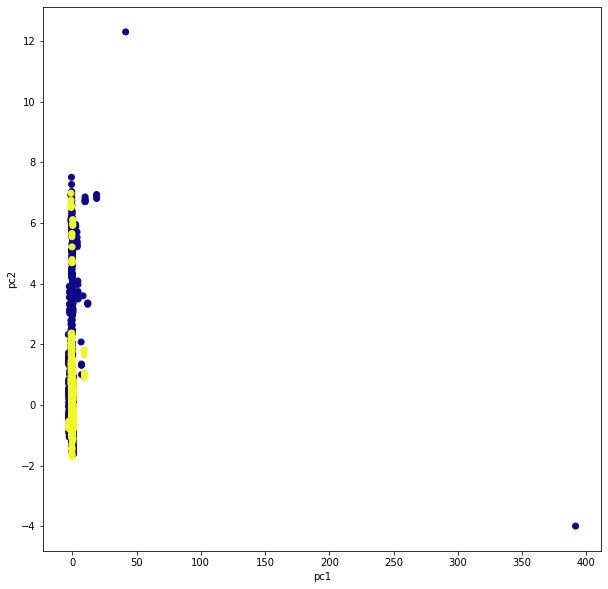

In [254]:
plt.figure(figsize=(10,10))
colors = np.random.rand(6247)
plt.scatter(x=x[:,0], y=x[:,1], c=encoded_labels, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

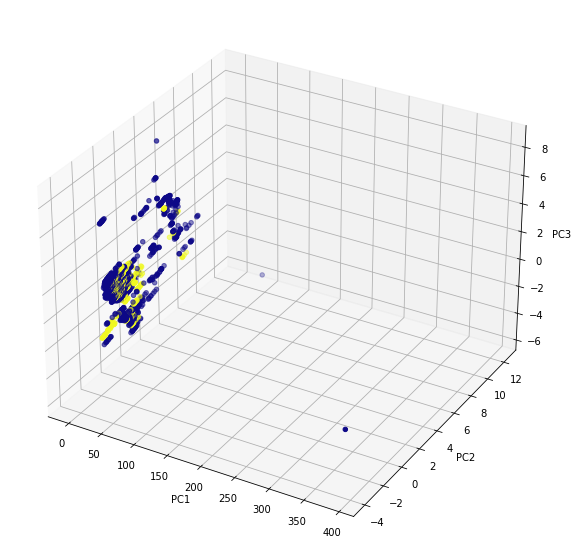

In [255]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=encoded_labels,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Mesmo com as features menos relevantes removidas, ainda há indecisão na separação, mas vamos testar dessa forma.

### Modelo

In [256]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=SEED)

## Treinamento

In [257]:
model.fit(X_train_dropped, y_train_dropped)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=2022)

## Teste

In [258]:
model.score(X_test_dropped, y_test_dropped)

0.5218932643479928

In [259]:
y_pred = model.predict(X_test_dropped)
print(metrics.classification_report(y_test_dropped, y_pred))

              precision    recall  f1-score   support

           A       0.48      0.96      0.64      4286
           B       1.00      0.40      0.57         5
           C       0.00      0.00      0.00       103
           D       0.00      0.00      0.00       353
           E       0.52      0.12      0.20      1095
           F       0.18      0.02      0.04      1962
           G       0.00      0.00      0.00       447
           H       0.51      0.07      0.12       520
           I       0.92      0.82      0.86       832
           W       0.11      0.02      0.04        45
           X       0.72      0.73      0.73       522
           Y       0.56      0.25      0.35       267

    accuracy                           0.52     10437
   macro avg       0.42      0.28      0.30     10437
weighted avg       0.44      0.52      0.41     10437



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


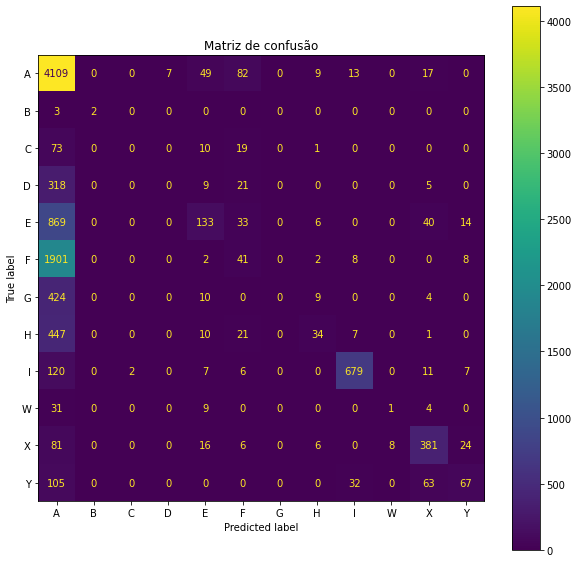

In [260]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Matriz de confusão")
conf_mat = metrics.confusion_matrix(y_test_dropped, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
disp.plot(ax=ax)
plt.show()

### Conclusão

Não foi possível obter melhorias no modelo removendo algumas colunas, principalmente devido ao desbalanceamento do dataset. Assim, vamos tentar mesclar as abordagens: reduzir o número de casos e remover features menos importantes.

# Modelo com mudança nas colunas e no balanceamento do dataset

## Setup do modelo

Para este modelo, vamos reduzir o número de exemplos das classes A e F e remover as colunas menos relevantes para a classificação.

In [261]:
balanced_dataset = avila_tr.drop(avila_tr.query("Class == 'A'").sample(frac=0.7).index)
balanced_dataset = balanced_dataset.drop(balanced_dataset.query("Class == 'F'").sample(frac=0.5).index)
balanced_dataset.shape

(6450, 11)

In [262]:
X_train_balanced = balanced_dataset.iloc[:, :-1]
y_train_balanced = balanced_dataset.iloc[:, -1]

### Análise utilizando PCA

Vamos utilizar o PCA novamente para verificar se o dataset balanceado e com colunas removidas consegue uma melhor separação.

In [263]:
avila_tr_A = balanced_dataset.query("Class == 'A'")
avila_tr_F = balanced_dataset.query("Class == 'F'")
avila_tr_A_F = pd.concat([avila_tr_A, avila_tr_F], axis=0)

X_train_A_F = avila_tr_A_F.iloc[:, :-1]
y_train_A_F = avila_tr_A_F.iloc[:, -1]

In [264]:
from sklearn.decomposition import PCA

Como os dados já estão normalizados, podemos partir para o "fit" e o "transform" no PCA

In [265]:
principal = PCA(n_components=3)
principal.fit(X_train_A_F)
x = principal.transform(X_train_A_F)
x.shape

(2267, 3)

O número de features foi reduzida para 3. Com o PCA feito, podemos plotar um gráfico para verificar se os componentes principais conseguem separar as classes A e F.

In [266]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train_A_F)
encoded_labels = le.transform(y_train_A_F)
encoded_labels

array([0, 0, 0, ..., 1, 1, 1])

Text(0, 0.5, 'pc2')

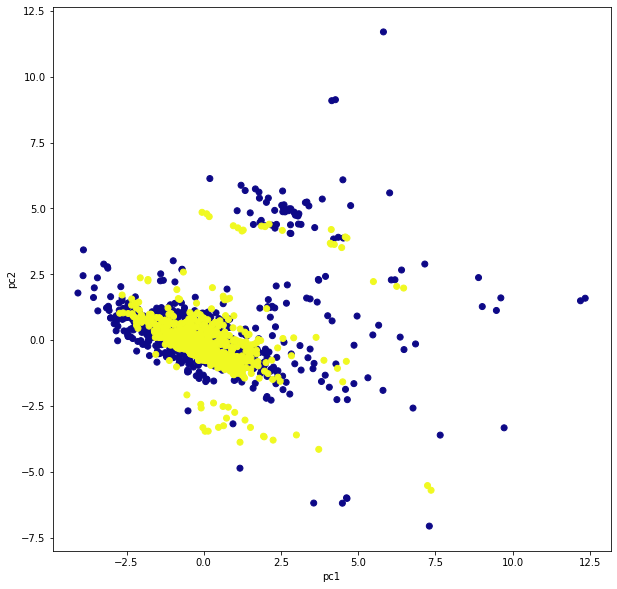

In [267]:
plt.figure(figsize=(10,10))
colors = np.random.rand(6247)
plt.scatter(x=x[:,0], y=x[:,1], c=encoded_labels, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

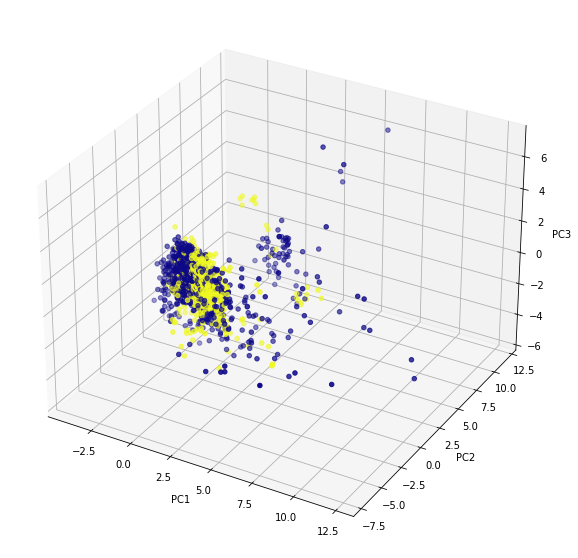

In [268]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=encoded_labels,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Utilizando o PCA foi possível ver que, mesmo utilizando os principais componentes para separar os dados, eles ainda não são bem separáveis. Assim, vamos tentar reduzir o número de features, mantendo as mais relevantes de acordo com o artigo que acompanha o projeto.

### Removendo colunas do dataset

In [269]:
balanced_dataset_dropped = balanced_dataset.drop(columns=["modular ratio/ interlinear spacing", "weight", "modular ratio", "interlinear spacing"])

avila_ts_dropped = avila_ts.drop(columns=["modular ratio/ interlinear spacing", "weight", "modular ratio", "interlinear spacing"])

In [270]:
X_train_dropped = balanced_dataset_dropped.iloc[:, :-1]
y_train_dropped = balanced_dataset_dropped.iloc[:, -1]

X_test_dropped = avila_ts_dropped.iloc[:, :-1]
y_test_dropped = avila_ts_dropped.iloc[:, -1]

### Análise utilizando PCA para dataset com colunas removidas

In [271]:
avila_tr_A_dropped = balanced_dataset_dropped.query("Class == 'A'")
avila_tr_F_dropped = balanced_dataset_dropped.query("Class == 'F'")
avila_tr_A_F_dropped = pd.concat([avila_tr_A_dropped, avila_tr_F_dropped], axis=0)

X_train_A_F_dropped = avila_tr_A_F_dropped.iloc[:, :-1]
y_train_A_F_dropped = avila_tr_A_F_dropped.iloc[:, -1]

In [272]:
principal = PCA(n_components=3)
principal.fit(X_train_A_F_dropped)
x = principal.transform(X_train_A_F_dropped)
x.shape

(2267, 3)

O número de features foi reduzida para 3. Com o PCA feito, podemos plotar um gráfico para verificar se os componentes principais conseguem separar as classes A e F.

In [273]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train_A_F_dropped)
encoded_labels = le.transform(y_train_A_F_dropped)
encoded_labels

array([0, 0, 0, ..., 1, 1, 1])

Text(0, 0.5, 'pc2')

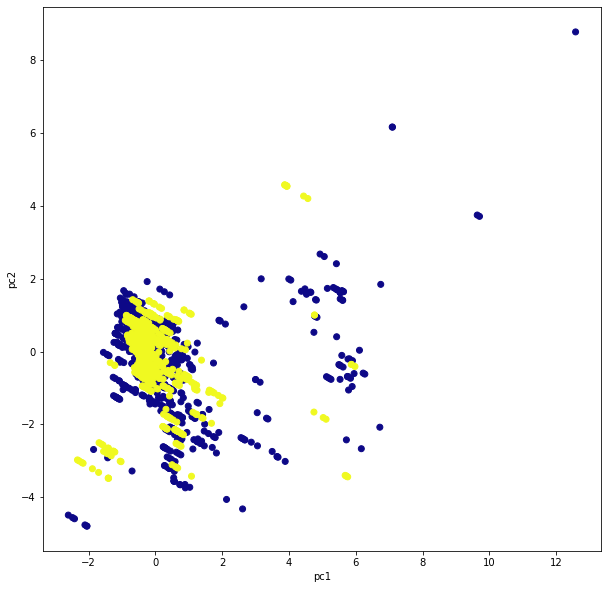

In [274]:
plt.figure(figsize=(10,10))
colors = np.random.rand(6247)
plt.scatter(x=x[:,0], y=x[:,1], c=encoded_labels, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

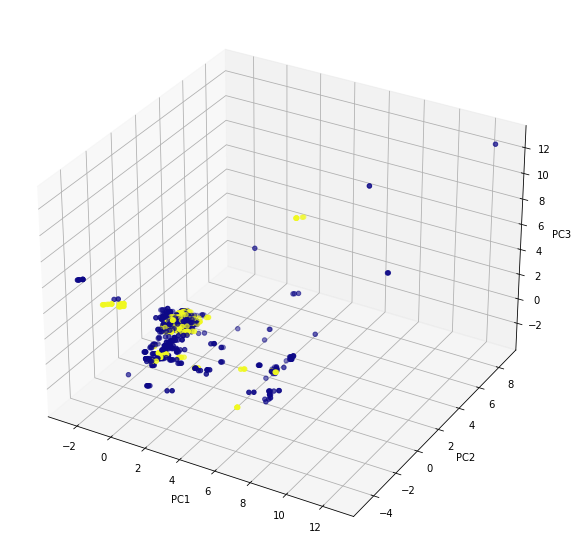

In [275]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=encoded_labels,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Dessa vez é possível ver um grau um pouco maior de separação, principalmente se considerarmos os exemplos que estão mais distantes do bloco que concentra a maioria dos exemplos.

### Modelo

In [276]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=SEED)

## Treinamento

In [277]:
model.fit(X_train_dropped, y_train_dropped)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=2022)

## Teste

In [278]:
model.score(X_test_dropped, y_test_dropped)

0.5102998946057297

In [279]:
y_pred = model.predict(X_test_dropped)
print(metrics.classification_report(y_test_dropped, y_pred))

              precision    recall  f1-score   support

           A       0.61      0.66      0.64      4286
           B       1.00      1.00      1.00         5
           C       0.00      0.00      0.00       103
           D       0.00      0.00      0.00       353
           E       0.31      0.64      0.41      1095
           F       0.37      0.28      0.32      1962
           G       0.00      0.00      0.00       447
           H       0.24      0.17      0.20       520
           I       0.82      0.84      0.83       832
           W       0.11      0.02      0.04        45
           X       0.64      0.76      0.69       522
           Y       0.47      0.26      0.34       267

    accuracy                           0.51     10437
   macro avg       0.38      0.38      0.37     10437
weighted avg       0.48      0.51      0.48     10437



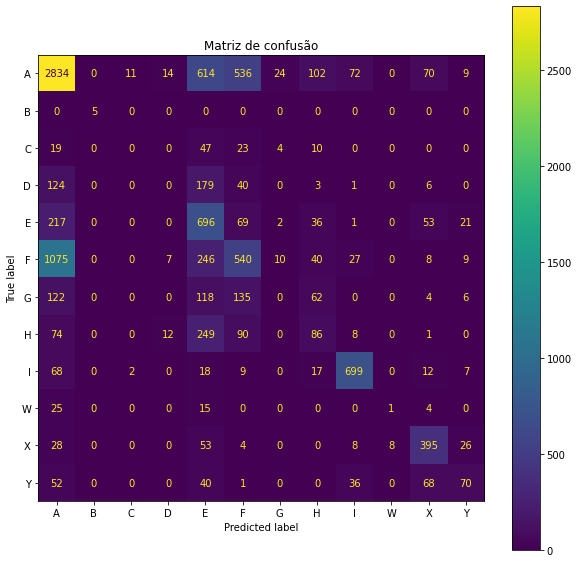

In [280]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Matriz de confusão")
conf_mat = metrics.confusion_matrix(y_test_dropped, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
disp.plot(ax=ax)
plt.show()

### Conclusão

Mesmo com as mudanças, não foi possível melhorar a acurácia. Além disso, com menos exemplos no treinamento, o modelo não conseguiu informações suficientes para classificar A e F, o que também contribuiu para piorar a acurácia.

# Modelo feito manualmente

## Setup do modelo

Para este modelo, vamos programar uma classe para realizar uma avaliação "one vs rest".

In [281]:
class All_datasets:
  def __init__(self, dataset_tr, dataset_ts):
    self.dataset_tr = dataset_tr
    self.dataset_ts = dataset_ts
    self.classes_tr = self.dataset_tr['Class'].unique()
    self.classes_ts = self.dataset_ts['Class'].unique()
    self.datasets_tr = dict()
    self.datasets_ts = dict()
    self.X_train = dict()
    self.y_train = dict()
    self.X_test = dict()
    self.y_test = dict()
    self.models = dict()
  
  def setup_tr(self):
    for classe in self.classes_tr:
      copied_dataset_tr = self.dataset_tr.copy(deep=True)
      copied_dataset_tr.loc[copied_dataset_tr['Class'] == classe, "Class"] = 1
      copied_dataset_tr.loc[copied_dataset_tr['Class'] != 1, "Class"] = 0
      copied_dataset_tr['Class'] = copied_dataset_tr['Class'].astype(int)
      self.datasets_tr[classe] = copied_dataset_tr
  
  def setup_ts(self): 
    for classe in self.classes_ts:
      copied_dataset_ts = self.dataset_ts.copy(deep=True)
      copied_dataset_ts.loc[copied_dataset_ts['Class'] == classe, "Class"] = 1
      copied_dataset_ts.loc[copied_dataset_ts['Class'] != 1, "Class"] = 0
      copied_dataset_ts['Class'] = copied_dataset_ts['Class'].astype(int)
      self.datasets_ts[classe] = copied_dataset_ts

  def setup(self):
    self.setup_tr()
    self.setup_ts()

  def check_dataset_tr(self, classe):
    print(self.datasets_tr[classe])
  
  def check_dataset_ts(self, classe):
    print(self.datasets_ts[classe])

  def split_train_test(self):
    for classe in self.classes_tr:
      X_train = self.datasets_tr[classe].iloc[:, :-1]
      y_train = self.datasets_tr[classe].iloc[:, -1]
      self.X_train[classe] = X_train
      self.y_train[classe] = y_train

    for classe in self.classes_ts:
      X_test = self.datasets_ts[classe].iloc[:, :-1]
      y_test = self.datasets_ts[classe].iloc[:, -1]
      self.X_test[classe] = X_test
      self.y_test[classe] = y_test

  def create_models(self):
    for classe in self.classes_tr:
      self.models[classe] = LogisticRegression(max_iter=1000, random_state=SEED)
  
  def fit(self):
    for classe in self.classes_tr:
      self.models[classe].fit(self.X_train[classe], self.y_train[classe])
  
  def individual_score(self):
    for classe in self.classes_ts:
      print("Classe {cls} teve score: {scr}".format(cls = classe, scr = self.models[classe].score(self.X_test[classe], self.y_test[classe])))

  def predict(self):
    predicted_probas = dict()
    for classe in self.classes_ts:
      predicted_probas[classe] = []
      class_predict_proba = self.models[classe].predict_proba(self.X_test[classe])
      for prob in class_predict_proba:
        predicted_probas[classe].append(prob[1])

    predicted_list = []
    for i in range(len(predicted_probas["A"])):
      predicted = []
      for classe in self.classes_ts:
        predicted.append((classe, predicted_probas[classe][i]))
      predicted_list.append(predicted)
    
    final_predict = []
    for lst in predicted_list:
      final_predict.append(max(lst, key=lambda item:item[1])[0])
    
    return final_predict


### Modelo

In [282]:
all_datasets = All_datasets(avila_tr, avila_ts)
all_datasets.setup()
all_datasets.split_train_test()
all_datasets.create_models()

## Treinamento

In [283]:
all_datasets.fit()

## Teste

In [284]:
all_datasets.individual_score()

Classe W teve score: 0.995688416211555
Classe A teve score: 0.6878413337165852
Classe I teve score: 0.9686691578039667
Classe E teve score: 0.8915397144773403
Classe F teve score: 0.8054038516815176
Classe Y teve score: 0.9764300086231675
Classe H teve score: 0.9499856280540385
Classe D teve score: 0.9661780205039763
Classe G teve score: 0.9571716010347802
Classe X teve score: 0.9754718788924021
Classe C teve score: 0.9901312637731149
Classe B teve score: 0.9998083740538469


Pelos scores, é possível ver que, ao menos a nível individual, os modelos conseguem diferenciar entre exemplos que pertencem às classes e exemplos que não pertencem, realizando uma avaliação binária.

In [285]:
all_datasets_pred = all_datasets.predict()
print(metrics.classification_report(y_test, all_datasets_pred))

              precision    recall  f1-score   support

           A       0.50      0.97      0.66      4286
           B       1.00      1.00      1.00         5
           C       0.00      0.00      0.00       103
           D       0.00      0.00      0.00       353
           E       0.40      0.07      0.12      1095
           F       0.19      0.03      0.05      1962
           G       0.00      0.00      0.00       447
           H       0.47      0.08      0.13       520
           I       0.82      0.88      0.85       832
           W       0.00      0.00      0.00        45
           X       0.82      0.67      0.74       522
           Y       0.74      0.47      0.58       267

    accuracy                           0.53     10437
   macro avg       0.41      0.35      0.34     10437
weighted avg       0.43      0.53      0.42     10437



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


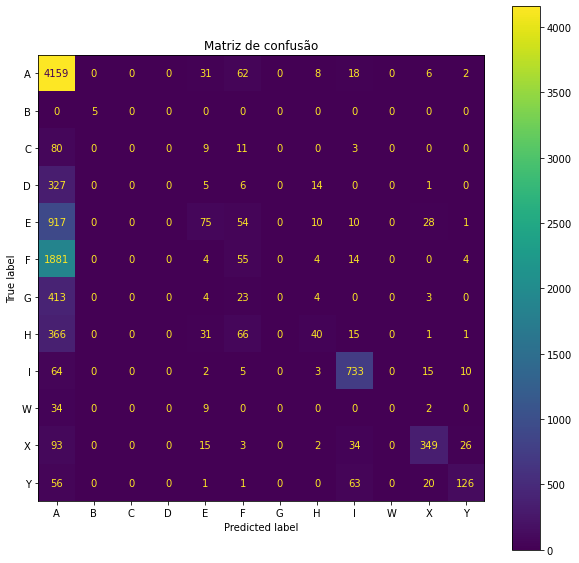

In [286]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title("Matriz de confusão")
conf_mat = metrics.confusion_matrix(y_test, all_datasets_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
disp.plot(ax=ax)
plt.show()

### Conclusão

Ainda que os modelos performem bem em avaliações binárias, o resultado permanece ruim quando eles são unidos. Isso pode ter ligação com a forma escolhida para uni-los, já que ela foi feita escolhendo como classe final aquela que possui maior probabilidade. Além disso, pelos scores individuais, é possível perceber que as classes que possuem mais exemplos (A, E e F) são as que têm menor score, o que indica que o número de casos pode estar introduzindo um viés na classificação dos exemplos.

# Referências

- https://satishgunjal.com/multiclass_lr_sklearn/#2020
- https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://builtin.com/machine-learning/logistic-regression-classification-algorithm
- https://www.statology.org/pandas-drop-rows-with-condition/
- https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/
- https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592